<a href="https://colab.research.google.com/github/aevelynr/RedWineQuality/blob/main/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("winequality-red.csv")
df = data.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.duplicated().sum() #checking for duplicated values

240

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
#Statistical Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


# Univariate Analysis

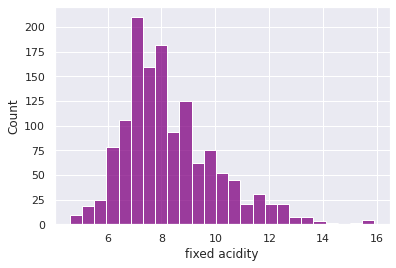

In [ ]:
sns.histplot(data=df, x = 'fixed acidity', color= 'purple', bins = 25);

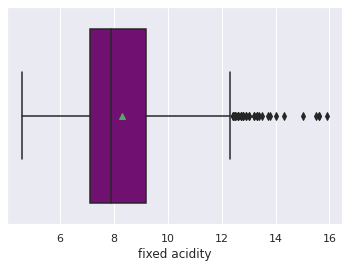

In [ ]:
sns.boxplot(data=df, x='fixed acidity', showmeans=True, color = 'purple');

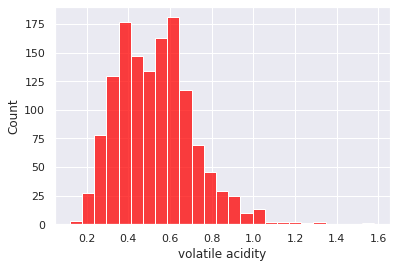

In [ ]:
sns.histplot(data=df, x = 'volatile acidity', color= 'red', bins = 25);

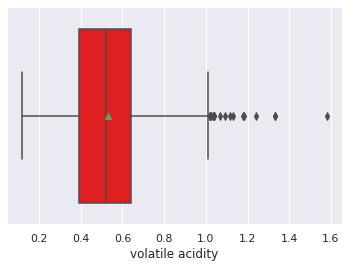

In [ ]:
sns.boxplot(data=df, x='volatile acidity', showmeans=True, color = 'red');

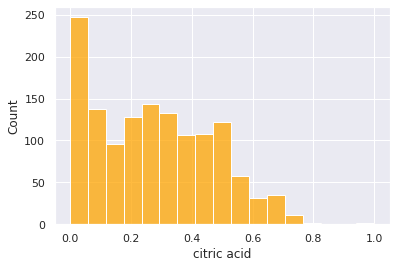

In [ ]:
sns.histplot(data=df, x = 'citric acid', color= 'orange');

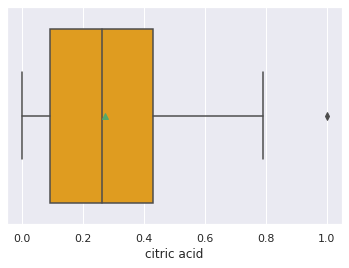

In [ ]:
sns.boxplot(data=df, x='citric acid', showmeans=True, color = 'orange');

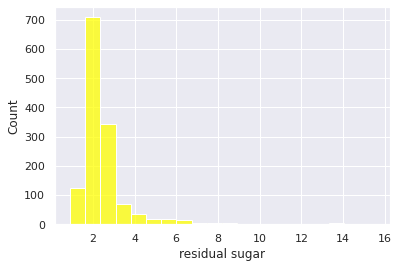

In [ ]:
sns.histplot(data=df, x = 'residual sugar', color= 'yellow', bins = 20);

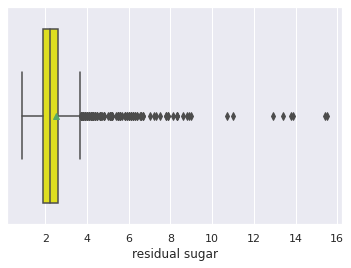

In [ ]:
sns.boxplot(data=df, x='residual sugar', showmeans=True, color = 'yellow');

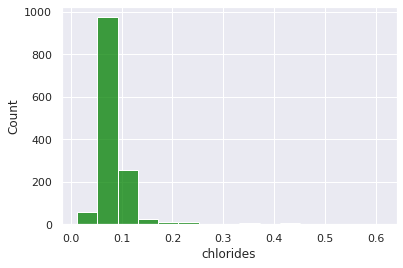

In [ ]:
sns.histplot(data=df, x = 'chlorides', color= 'green', bins = 15);

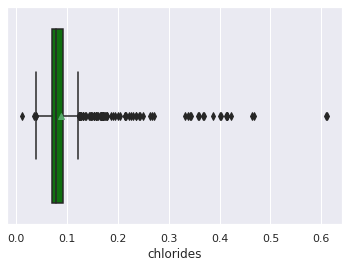

In [ ]:
sns.boxplot(data=df, x='chlorides', showmeans=True, color = 'green');

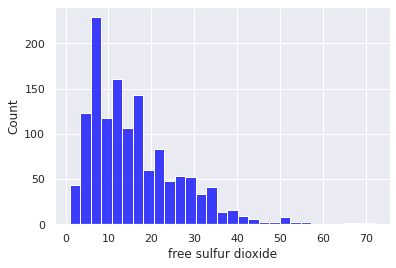

In [ ]:
sns.histplot(data=df, x = 'free sulfur dioxide', color= 'blue');

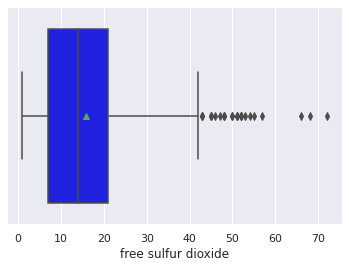

In [ ]:
sns.boxplot(data=df, x='free sulfur dioxide', showmeans=True, color = 'blue');

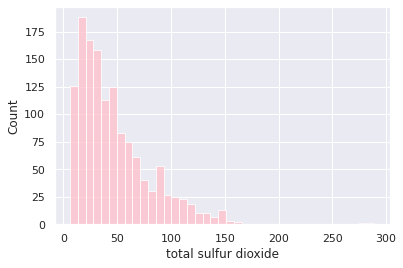

In [ ]:
sns.histplot(data=df, x = 'total sulfur dioxide', color= 'pink');

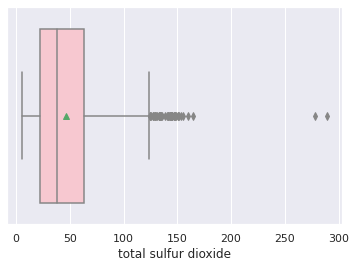

In [ ]:
sns.boxplot(data=df, x='total sulfur dioxide', showmeans=True, color = 'pink');

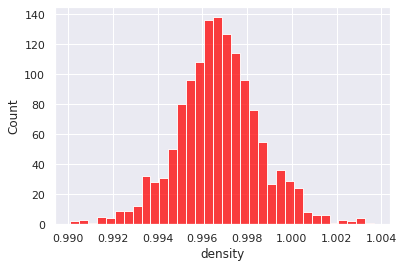

In [ ]:
sns.histplot(data=df, x = 'density', color= 'red');

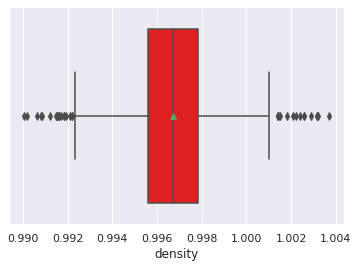

In [ ]:
sns.boxplot(data=df, x='density', showmeans=True, color = 'red');

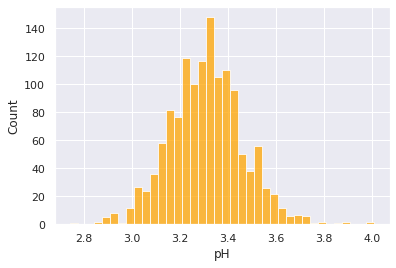

In [ ]:
sns.histplot(data=df, x = 'pH', color= 'orange');

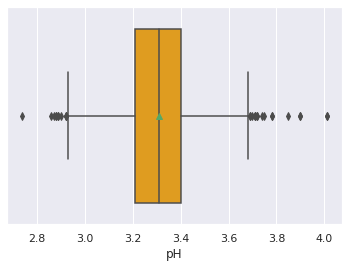

In [ ]:
sns.boxplot(data=df, x='pH', showmeans=True, color = 'orange');

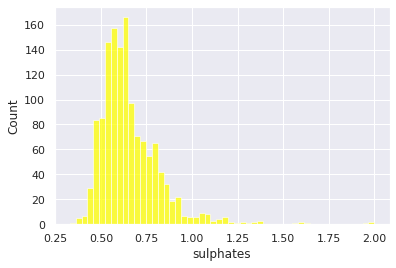

In [ ]:
sns.histplot(data=df, x = 'sulphates', color= 'yellow');

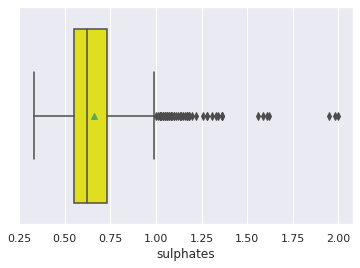

In [ ]:
sns.boxplot(data=df, x='sulphates', showmeans=True, color = 'yellow');

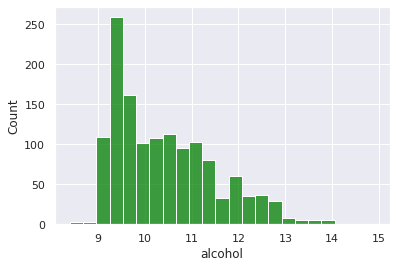

In [ ]:
sns.histplot(data=df, x = 'alcohol', color= 'green');

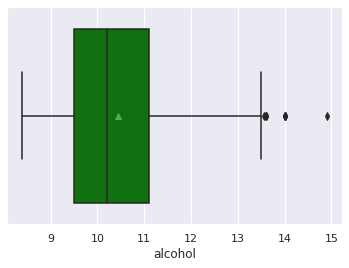

In [ ]:
sns.boxplot(data=df, x='alcohol', showmeans=True, color = 'green');

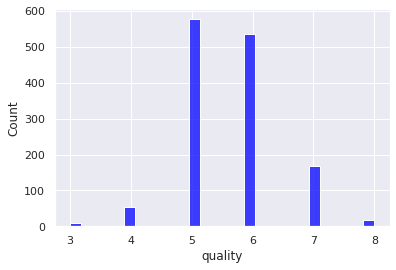

In [ ]:
sns.histplot(data=df, x = 'quality', color= 'blue');

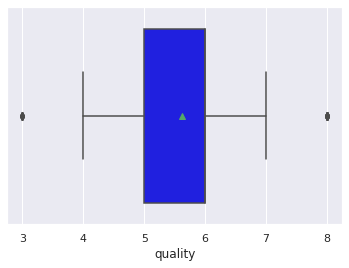

In [ ]:
sns.boxplot(data=df, x='quality', showmeans=True, color = 'blue');

# Bivariate Analysis

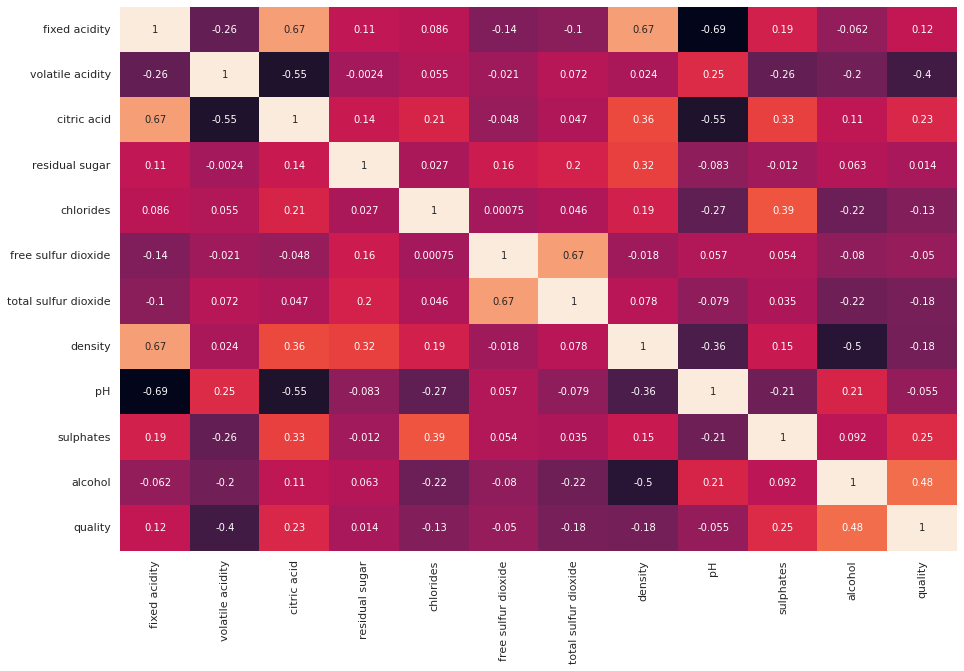

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True, cbar=False);

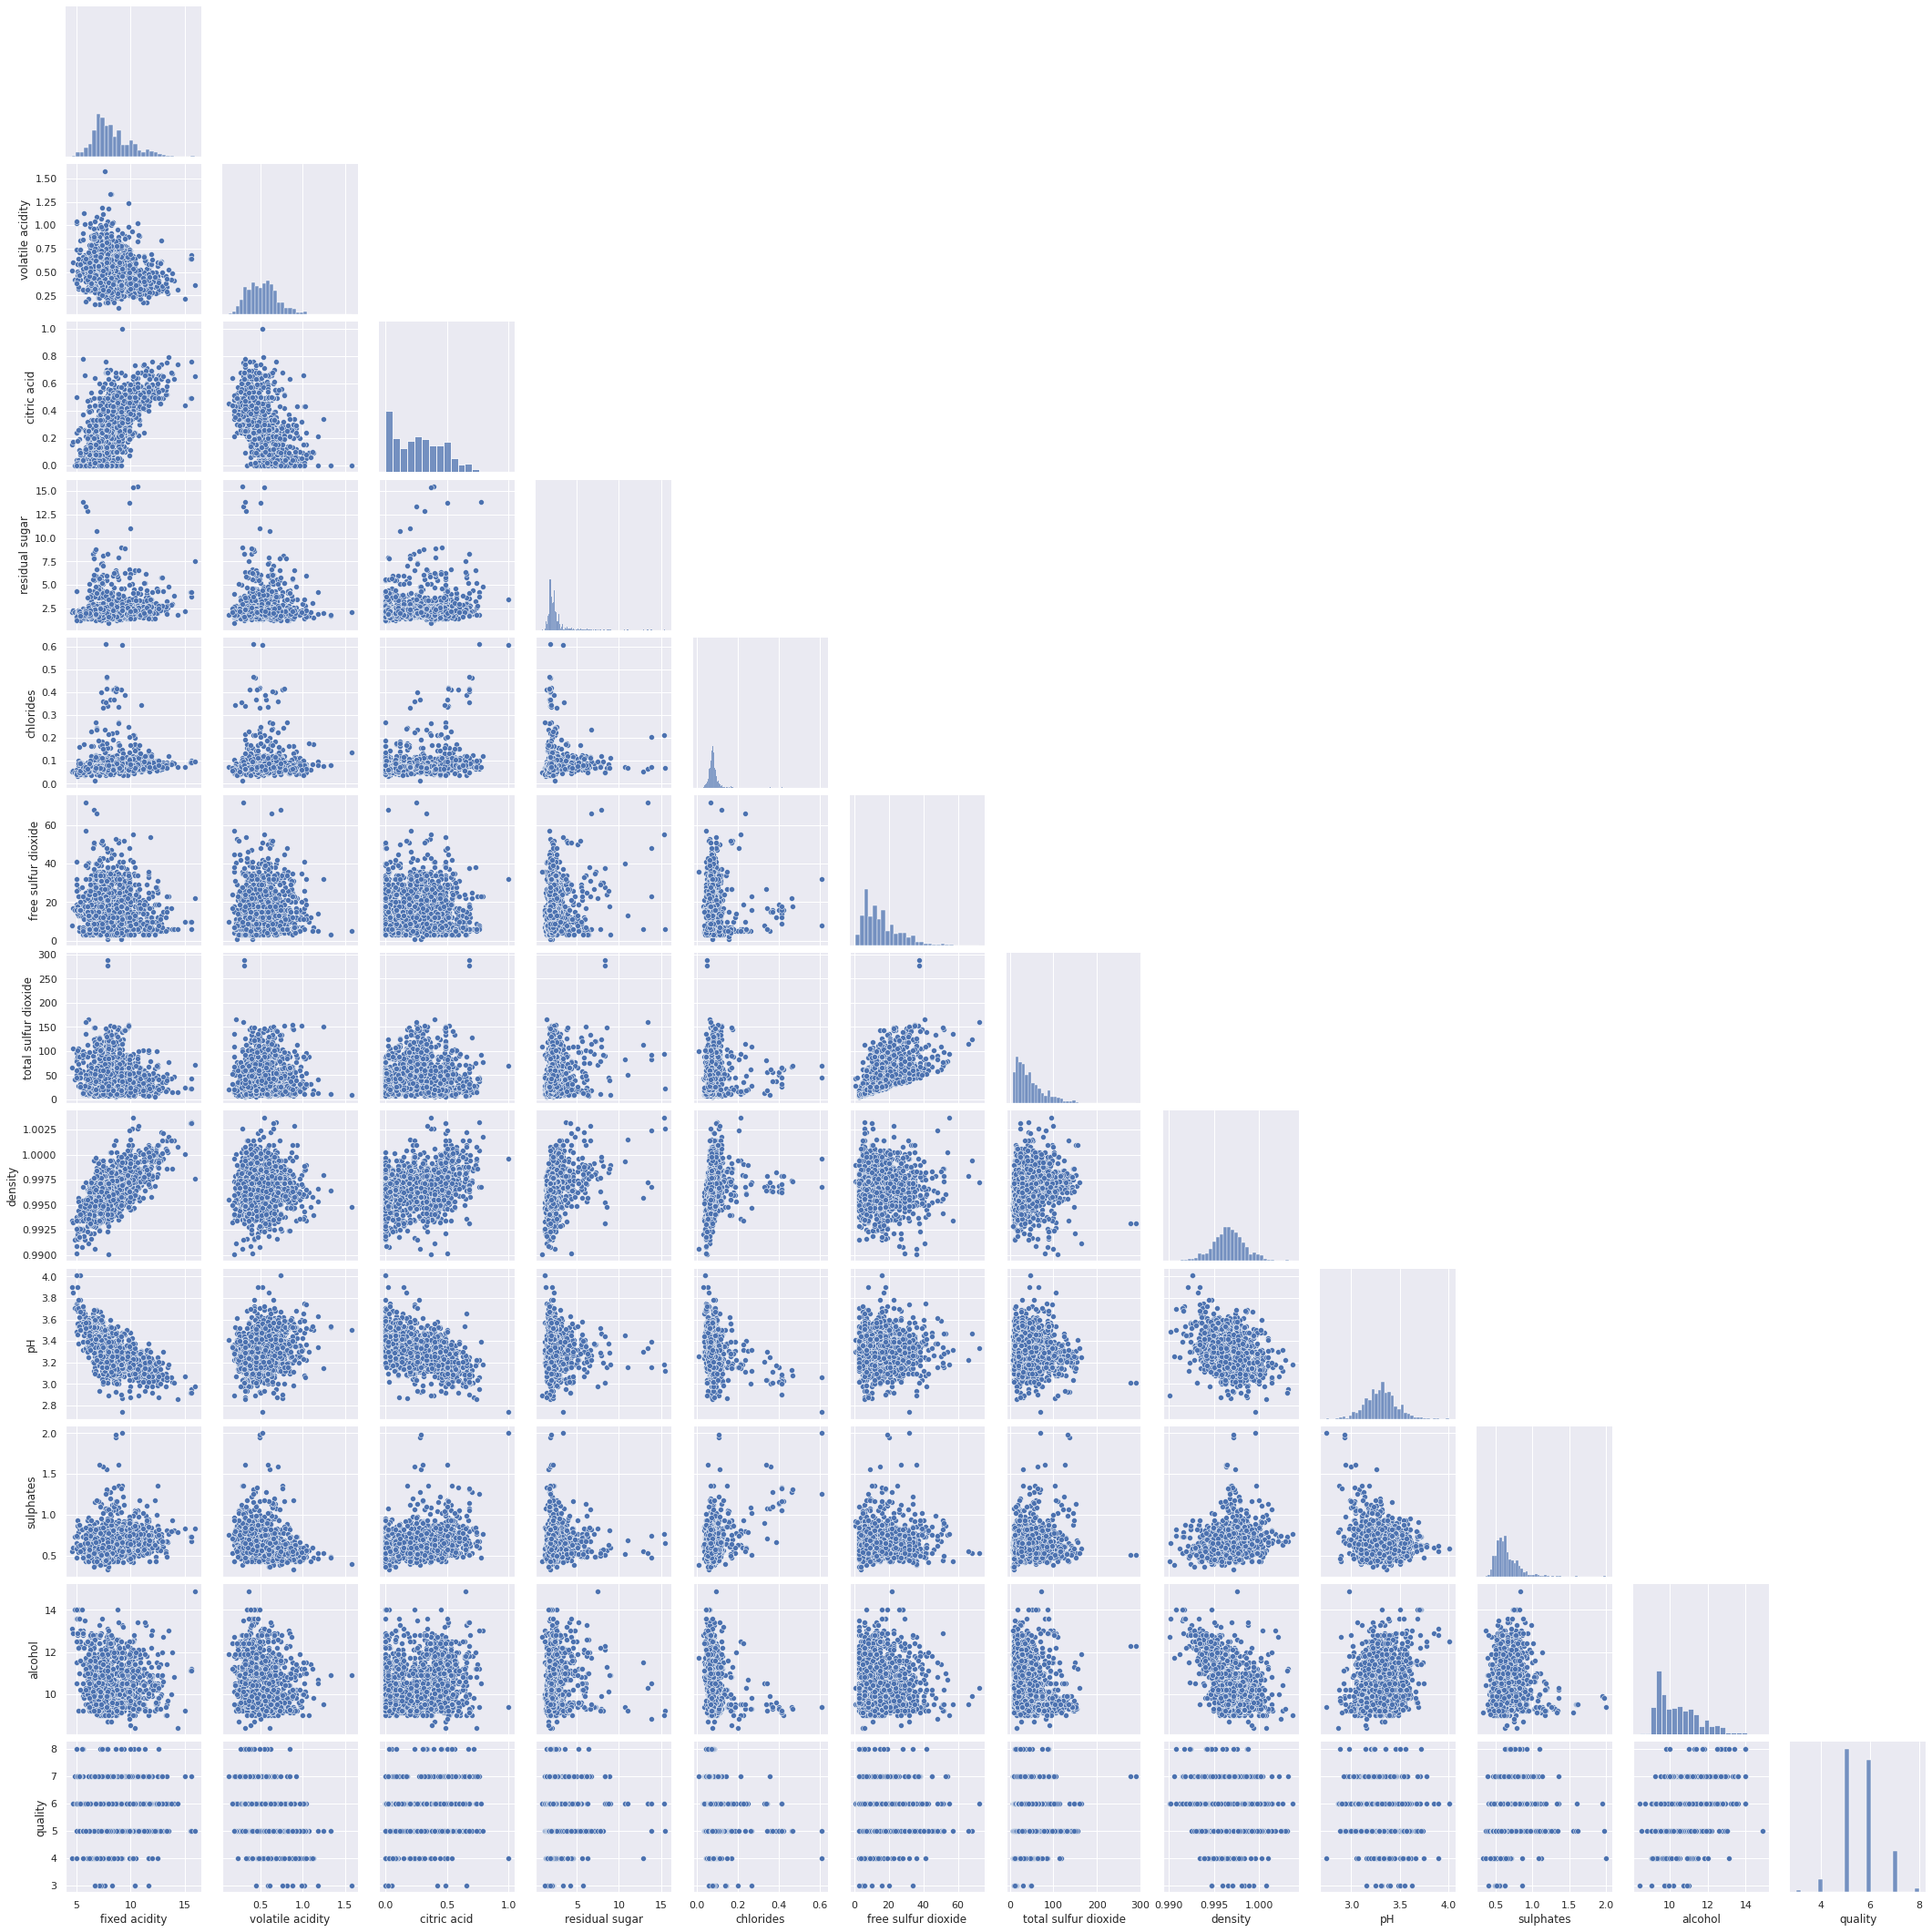

In [ ]:
sns.pairplot(data=df, corner=True);

# Split the Data

In [ ]:
# independent variables
X = df.drop(["quality"], axis=1)
# dependent variable
y = df[["quality"]]

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
print(X_train.head())

      const  fixed acidity  volatile acidity  citric acid  residual sugar  \
303     1.0            7.4             0.670         0.12             1.6   
1292    1.0            5.9             0.395         0.13             2.4   
695     1.0            5.1             0.470         0.02             1.3   
451     1.0            8.4             0.370         0.53             1.8   
1309    1.0            7.0             0.620         0.10             1.4   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
303       0.186                  5.0                  21.0  0.99600  3.39   
1292      0.056                 14.0                  28.0  0.99362  3.62   
695       0.034                 18.0                  44.0  0.99210  3.90   
451       0.413                  9.0                  26.0  0.99790  3.06   
1309      0.071                 27.0                  63.0  0.99600  3.28   

      sulphates  alcohol  
303        0.54      9.5  
1292       0.67     

In [ ]:
print(X_test.head())

      const  fixed acidity  volatile acidity  citric acid  residual sugar  \
473     1.0            9.9             0.350         0.55             2.1   
1376    1.0            8.2             0.885         0.20             1.4   
533     1.0           10.3             0.270         0.24             2.1   
200     1.0            9.6             0.320         0.47             1.4   
268     1.0            6.9             0.540         0.04             3.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
473       0.062                  5.0                  14.0  0.99710  3.26   
1376      0.086                  7.0                  31.0  0.99460  3.11   
533       0.072                 15.0                  33.0  0.99560  3.22   
200       0.056                  9.0                  24.0  0.99695  3.22   
268       0.077                  7.0                  27.0  0.99870  3.69   

      sulphates  alcohol  
473        0.79     10.6  
1376       0.46     

# Fit Linear Model

In [ ]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [ ]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     59.92
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          1.45e-100
Time:                        20:20:23   Log-Likelihood:                -923.34
No. Observations:                 951   AIC:                             1871.
Df Residuals:                     939   BIC:                             1929.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.5065 

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   1.747171e+06
fixed acidity           7.777528e+00
volatile acidity        1.884554e+00
citric acid             3.279645e+00
residual sugar          1.621626e+00
chlorides               1.443818e+00
free sulfur dioxide     2.054563e+00
total sulfur dioxide    2.342523e+00
density                 6.280343e+00
pH                      3.327538e+00
sulphates               1.461154e+00
alcohol                 3.172079e+00
dtype: float64



In [ ]:
X_train2 = X_train.drop(["fixed acidity"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 5),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 5),
)

R-squared: 0.41243 
Adjusted R-squared: 0.40618


In [ ]:
X_train3 = X_train.drop(["density"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 5),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 5),)

R-squared: 0.4123 
Adjusted R-squared: 0.40605


In [ ]:
X_train = X_train.drop(["fixed acidity"], axis=1)

In [ ]:
olsmod_3 = sm.OLS(y_train, X_train)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     65.98
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          1.74e-101
Time:                        20:20:23   Log-Likelihood:                -923.34
No. Observations:                 951   AIC:                             1869.
Df Residuals:                     940   BIC:                             1922.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.3184 

In [ ]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   695972.066719
volatile acidity             1.877378
citric acid                  2.985165
residual sugar               1.339540
chlorides                    1.366136
free sulfur dioxide          2.035376
total sulfur dioxide         2.249162
density                      2.385134
pH                           1.679178
sulphates                    1.432436
alcohol                      2.171592
dtype: float64



In [ ]:
X_train = X_train.drop(["citric acid"], axis=1)


In [ ]:
olsmod_4 = sm.OLS(y_train, X_train)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     73.32
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          2.39e-102
Time:                        20:20:24   Log-Likelihood:                -923.54
No. Observations:                 951   AIC:                             1867.
Df Residuals:                     941   BIC:                             1916.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.5302 

In [ ]:
X_train = X_train.drop(["density"], axis=1)


In [ ]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     82.53
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          2.81e-103
Time:                        20:21:26   Log-Likelihood:                -923.64
No. Observations:                 951   AIC:                             1865.
Df Residuals:                     942   BIC:                             1909.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3814 

In [ ]:
X_train = X_train.drop(["residual sugar"], axis=1)


In [ ]:
olsmod_6 = sm.OLS(y_train, X_train)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     94.10
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          5.33e-104
Time:                        20:22:00   Log-Likelihood:                -924.30
No. Observations:                 951   AIC:                             1865.
Df Residuals:                     943   BIC:                             1903.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3206 

# Predictions

In [ ]:
#Creating a Dataframe of Actual Values, Fitted Values, and Residuals
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_6.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_6.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,5,4.864636,0.135364
1,6,6.321722,-0.321722
2,6,6.166456,-0.166456
3,6,5.400160,0.599840
4,5,5.167535,-0.167535


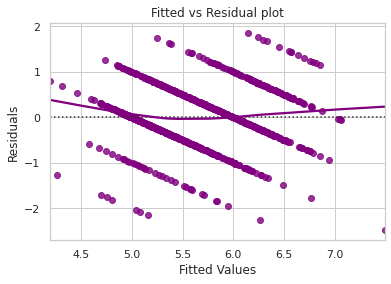

In [ ]:
#Plotting Fitted Values and Residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

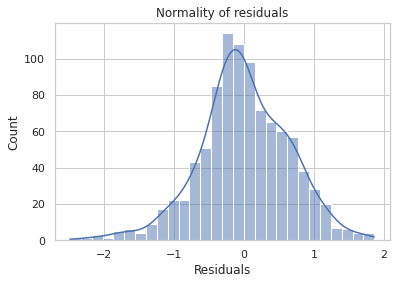

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

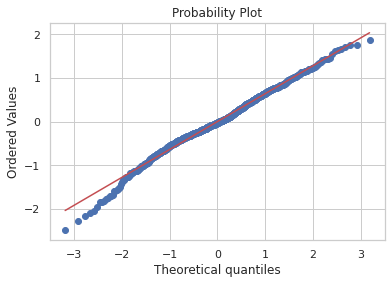

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
#Shapiro-Wilkes Test
#The null hypothesis: The data is normally distributed
#The alternative hypothesis: The data is not normally distributed.
stats.shapiro(df_pred["Residuals"])

(0.9914817810058594, 2.651114482432604e-05)

In [ ]:
#Test for Homoscedacity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#The null hypothesis: The residuals are homoscedastic and are symmetrically distributed across the regression line.
#The alternative hypothesis: The residuals are heteroscedastic and are not symmetrically distributed.

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 1.0501842406756017), ('p-value', 0.2983718562261827)]

In [ ]:
#Final Regression Summary
olsmod6 = sm.OLS(y_train, X_train).fit()
print(olsmod6.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     94.10
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          5.33e-104
Time:                        20:25:06   Log-Likelihood:                -924.30
No. Observations:                 951   AIC:                             1865.
Df Residuals:                     943   BIC:                             1903.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3206 

In [ ]:
# The equation of linear regression
Equation = "quality ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_6.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_6.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_6.params[i], "* (", X_train.columns[i], ")")

quality = 4.320622253323623 + -1.0345955565698939 * ( volatile acidity ) +  -1.86072197588741 * ( chlorides ) +  0.006001142651429462 * ( free sulfur dioxide ) +  -0.003388477255751419 * ( total sulfur dioxide ) +  -0.5509029137168072 * ( pH ) +  1.1160113951104293 * ( sulphates ) +  0.30414253461242213 * ( alcohol )


In [ ]:
#Verifying the X Train Columns
X_train.columns

Index(['const', 'volatile acidity', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
#Comparing the X Test Column
X_test.columns

Index(['const', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["fixed acidity", "citric acid", "residual sugar", "density"], axis=1
)

In [ ]:
X_test2

,const,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
473,1.0,0.350,0.062,5.0,14.0,3.26,0.79,10.6
1376,1.0,0.885,0.086,7.0,31.0,3.11,0.46,10.0
533,1.0,0.270,0.072,15.0,33.0,3.22,0.66,12.8
200,1.0,0.320,0.056,9.0,24.0,3.22,0.82,10.3
268,1.0,0.540,0.077,7.0,27.0,3.69,0.91,9.4
...,...,...,...,...,...,...,...,...
938,1.0,0.380,0.068,23.0,42.0,3.34,0.72,12.9
1101,1.0,0.490,0.071,14.0,25.0,3.35,0.63,12.0
1434,1.0,0.540,0.214,55.0,95.0,3.18,0.77,9.0
768,1.0,0.590,0.082,24.0,94.0,3.55,0.53,9.7


In [ ]:
y_pred = olsres_6.predict(X_test2)

In [ ]:
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

0.6395322938649448

In [ ]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.7023226217914887

In [ ]:
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

0.4933909355269661

In [ ]:
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.5408635762090465